# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

features & labels

In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

model function using loop

In [3]:
def f_wb_loop(x, w, b):
    m = x.shape[0]
    prediction = 0
    for i in range(m):
        p_i = x[i] * w[i]
        prediction += p_i
    prediction += b
    return prediction

model function with numpy

In [4]:
def f_wb(x, w, b):
    prediction = np.dot(x, w) + b
    return prediction

cost function

In [5]:
def j_wb(x, y, w, b):
    m = x.shape[0]
    j = np.sum(((np.dot(x, w) + b) - y) ** 2)
    j /= 2 * m
    return j

model training

In [6]:
# get a row from dataset
sample = x_train[0, :]

# parameters
b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])

# run model
prediction = f_wb(sample, w_init, b_init)
prediction_loop = f_wb_loop(sample, w_init, b_init)
cost = j_wb(x_train, y_train, w_init, b_init)

print(f"prediction using numpy: {prediction.round(2)}")
print(f"prediction using loop: {prediction_loop.round(2)}")
print(f"cost: {cost}")

prediction using numpy: 460.0
prediction using loop: 460.0
cost: 1.5578904045996674e-12


Math

In [7]:
# X = np.array([[1], [5], [7], [8]])
# y = np.array([2])

X = np.array([[1, 2, 3], [5, 6, 7], [7, 4, 1], [8, 5, 2]])
y = np.array([2, 5, 8, 7])
w = np.ones(X.shape[1])
b = 0.0

print("X:\n", X)
print("\nw:", w)
print("\nX @ w (each w @ its feature to get the y^ of each sample and we can + b):\n", X @ w + b)

print("\nerror y^ - y:\n", (X @ w + b) - y)

print("\neach sample:\n", X.T)
print("\neach sample @ its error befor sum them:\n", X.T @ ((X @ w + b) - y))

X:
 [[1 2 3]
 [5 6 7]
 [7 4 1]
 [8 5 2]]

w: [1. 1. 1.]

X @ w (each w @ its feature to get the y^ of each sample and we can + b):
 [ 6. 18. 12. 15.]

error y^ - y:
 [ 4. 13.  4.  8.]

each sample:
 [[1 5 7 8]
 [2 6 4 5]
 [3 7 1 2]]

each sample @ its error befor sum them:
 [161. 142. 123.]


Gradient

In [8]:
def gradient(x, y, w, b):
    m = x.shape[0]
    f_wb = x @ w + b
    e = f_wb - y
    dj_dw = (1 / m) * (x.T @ e)
    dj_db = (1 / m) * np.sum(e)
    return dj_db, dj_dw

Gradient Descent

In [9]:
def gradient_descent(X, y, alpha, num_iters, w=None, b=None, j_wb=j_wb):
    w = np.zeros(X.shape[1])
    b = 0.0
    Js = []
    for i in range(num_iters):
        dj_db, dj_dw = gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        Js.append(j_wb(X, y, w, b))
        if num_iters > 0 and i % (num_iters // 10) == 0:
            print("Iteration {:4d}: Cost {:8.2f}".format(i, Js[-1]))
    return w, b

make predection

In [10]:
# initialization
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final = gradient_descent(
    x_train,
    y_train,
    alpha=alpha,
    num_iters=iterations,
)
print(f"b,w found by gradient descent: {b_final.round(2)},{w_final.round(2)}")
for i in range(x_train.shape[0]):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final}, target: {y_train[i]}")

Iteration    0: Cost  2529.46
Iteration  100: Cost   695.99
Iteration  200: Cost   694.92
Iteration  300: Cost   693.86
Iteration  400: Cost   692.81
Iteration  500: Cost   691.77
Iteration  600: Cost   690.73
Iteration  700: Cost   689.71
Iteration  800: Cost   688.70
Iteration  900: Cost   687.69
b,w found by gradient descent: -0.0,[ 0.2   0.   -0.01 -0.07]
prediction: 426.185304971892, target: 460
prediction: 286.1674720078562, target: 232
prediction: 171.46763087132314, target: 178


# Feature Scaling & Learning Rate

In [11]:
X = np.array(
    [
        [1.24e03, 3.00e00, 1.00e00, 6.40e01],
        [1.95e03, 3.00e00, 2.00e00, 1.70e01],
        [1.72e03, 3.00e00, 2.00e00, 4.20e01],
        [1.96e03, 3.00e00, 2.00e00, 1.50e01],
        [1.31e03, 2.00e00, 1.00e00, 1.40e01],
        [8.64e02, 2.00e00, 1.00e00, 6.60e01],
        [1.84e03, 3.00e00, 1.00e00, 1.70e01],
        [1.03e03, 3.00e00, 1.00e00, 4.30e01],
        [3.19e03, 4.00e00, 2.00e00, 8.70e01],
        [7.88e02, 2.00e00, 1.00e00, 8.00e01],
        [1.20e03, 2.00e00, 2.00e00, 1.70e01],
        [1.56e03, 2.00e00, 1.00e00, 1.80e01],
        [1.43e03, 3.00e00, 1.00e00, 2.00e01],
        [1.22e03, 2.00e00, 1.00e00, 1.50e01],
        [1.09e03, 2.00e00, 1.00e00, 6.40e01],
        [8.48e02, 1.00e00, 1.00e00, 1.70e01],
        [1.68e03, 3.00e00, 2.00e00, 2.30e01],
        [1.77e03, 3.00e00, 2.00e00, 1.80e01],
        [1.04e03, 3.00e00, 1.00e00, 4.40e01],
        [1.65e03, 2.00e00, 1.00e00, 2.10e01],
        [1.09e03, 2.00e00, 1.00e00, 3.50e01],
        [1.32e03, 3.00e00, 1.00e00, 1.40e01],
        [1.59e03, 0.00e00, 1.00e00, 2.00e01],
        [9.72e02, 2.00e00, 1.00e00, 7.30e01],
        [1.10e03, 3.00e00, 1.00e00, 3.70e01],
        [1.00e03, 2.00e00, 1.00e00, 5.10e01],
        [9.04e02, 3.00e00, 1.00e00, 5.50e01],
        [1.69e03, 3.00e00, 1.00e00, 1.30e01],
        [1.07e03, 2.00e00, 1.00e00, 1.00e02],
        [1.42e03, 3.00e00, 2.00e00, 1.90e01],
        [1.16e03, 3.00e00, 1.00e00, 5.20e01],
        [1.94e03, 3.00e00, 2.00e00, 1.20e01],
        [1.22e03, 2.00e00, 2.00e00, 7.40e01],
        [2.48e03, 4.00e00, 2.00e00, 1.60e01],
        [1.20e03, 2.00e00, 1.00e00, 1.80e01],
        [1.84e03, 3.00e00, 2.00e00, 2.00e01],
        [1.85e03, 3.00e00, 2.00e00, 5.70e01],
        [1.66e03, 3.00e00, 2.00e00, 1.90e01],
        [1.10e03, 2.00e00, 2.00e00, 9.70e01],
        [1.78e03, 3.00e00, 2.00e00, 2.80e01],
        [2.03e03, 4.00e00, 2.00e00, 4.50e01],
        [1.78e03, 4.00e00, 2.00e00, 1.07e02],
        [1.07e03, 2.00e00, 1.00e00, 1.00e02],
        [1.55e03, 3.00e00, 1.00e00, 1.60e01],
        [1.95e03, 3.00e00, 2.00e00, 1.60e01],
        [1.22e03, 2.00e00, 2.00e00, 1.20e01],
        [1.62e03, 3.00e00, 1.00e00, 1.60e01],
        [8.16e02, 2.00e00, 1.00e00, 5.80e01],
        [1.35e03, 3.00e00, 1.00e00, 2.10e01],
        [1.57e03, 3.00e00, 1.00e00, 1.40e01],
        [1.49e03, 3.00e00, 1.00e00, 5.70e01],
        [1.51e03, 2.00e00, 1.00e00, 1.60e01],
        [1.10e03, 3.00e00, 1.00e00, 2.70e01],
        [1.76e03, 3.00e00, 2.00e00, 2.40e01],
        [1.21e03, 2.00e00, 1.00e00, 1.40e01],
        [1.47e03, 3.00e00, 2.00e00, 2.40e01],
        [1.77e03, 3.00e00, 2.00e00, 8.40e01],
        [1.65e03, 3.00e00, 1.00e00, 1.90e01],
        [1.03e03, 3.00e00, 1.00e00, 6.00e01],
        [1.12e03, 2.00e00, 2.00e00, 1.60e01],
        [1.15e03, 3.00e00, 1.00e00, 6.20e01],
        [8.16e02, 2.00e00, 1.00e00, 3.90e01],
        [1.04e03, 3.00e00, 1.00e00, 2.50e01],
        [1.39e03, 3.00e00, 1.00e00, 6.40e01],
        [1.60e03, 3.00e00, 2.00e00, 2.90e01],
        [1.22e03, 3.00e00, 1.00e00, 6.30e01],
        [1.07e03, 2.00e00, 1.00e00, 1.00e02],
        [2.60e03, 4.00e00, 2.00e00, 2.20e01],
        [1.43e03, 3.00e00, 1.00e00, 5.90e01],
        [2.09e03, 3.00e00, 2.00e00, 2.60e01],
        [1.79e03, 4.00e00, 2.00e00, 4.90e01],
        [1.48e03, 3.00e00, 2.00e00, 1.60e01],
        [1.04e03, 3.00e00, 1.00e00, 2.50e01],
        [1.43e03, 3.00e00, 1.00e00, 2.20e01],
        [1.16e03, 3.00e00, 1.00e00, 5.30e01],
        [1.55e03, 3.00e00, 2.00e00, 1.20e01],
        [1.98e03, 3.00e00, 2.00e00, 2.20e01],
        [1.06e03, 3.00e00, 1.00e00, 5.30e01],
        [1.18e03, 2.00e00, 1.00e00, 9.90e01],
        [1.36e03, 2.00e00, 1.00e00, 1.70e01],
        [9.60e02, 3.00e00, 1.00e00, 5.10e01],
        [1.46e03, 3.00e00, 2.00e00, 1.60e01],
        [1.45e03, 3.00e00, 2.00e00, 2.50e01],
        [1.21e03, 2.00e00, 1.00e00, 1.50e01],
        [1.55e03, 3.00e00, 2.00e00, 1.60e01],
        [8.82e02, 3.00e00, 1.00e00, 4.90e01],
        [2.03e03, 4.00e00, 2.00e00, 4.50e01],
        [1.04e03, 3.00e00, 1.00e00, 6.20e01],
        [1.62e03, 3.00e00, 1.00e00, 1.60e01],
        [8.03e02, 2.00e00, 1.00e00, 8.00e01],
        [1.43e03, 3.00e00, 2.00e00, 2.10e01],
        [1.66e03, 3.00e00, 1.00e00, 6.10e01],
        [1.54e03, 3.00e00, 1.00e00, 1.60e01],
        [9.48e02, 3.00e00, 1.00e00, 5.30e01],
        [1.22e03, 2.00e00, 2.00e00, 1.20e01],
        [1.43e03, 2.00e00, 1.00e00, 4.30e01],
        [1.66e03, 3.00e00, 2.00e00, 1.90e01],
        [1.21e03, 3.00e00, 1.00e00, 2.00e01],
        [1.05e03, 2.00e00, 1.00e00, 6.50e01],
    ]
)
y = np.array(
    [
        300.0,
        509.8,
        394.0,
        540.0,
        415.0,
        230.0,
        560.0,
        294.0,
        718.2,
        200.0,
        302.0,
        468.0,
        374.2,
        388.0,
        282.0,
        311.8,
        401.0,
        449.8,
        301.0,
        502.0,
        340.0,
        400.28,
        572.0,
        264.0,
        304.0,
        298.0,
        219.8,
        490.7,
        216.96,
        368.2,
        280.0,
        526.87,
        237.0,
        562.43,
        369.8,
        460.0,
        374.0,
        390.0,
        158.0,
        426.0,
        390.0,
        277.77,
        216.96,
        425.8,
        504.0,
        329.0,
        464.0,
        220.0,
        358.0,
        478.0,
        334.0,
        426.98,
        290.0,
        463.0,
        390.8,
        354.0,
        350.0,
        460.0,
        237.0,
        288.3,
        282.0,
        249.0,
        304.0,
        332.0,
        351.8,
        310.0,
        216.96,
        666.34,
        330.0,
        480.0,
        330.3,
        348.0,
        304.0,
        384.0,
        316.0,
        430.4,
        450.0,
        284.0,
        275.0,
        414.0,
        258.0,
        378.0,
        350.0,
        412.0,
        373.0,
        225.0,
        390.0,
        267.4,
        464.0,
        174.0,
        340.0,
        430.0,
        440.0,
        216.0,
        329.0,
        388.0,
        390.0,
        356.0,
        257.8,
    ]
)
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

plot the features

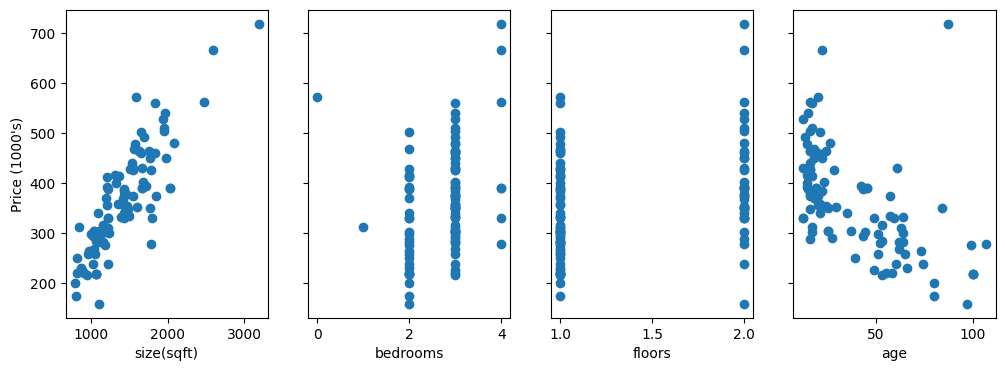

In [12]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

different learning rates

In [13]:
alpha = 9.9e-7

w_final, b_final = gradient_descent(X, y, alpha=alpha, num_iters=10)
print(f"b,w found by gradient descent: {b_final.round(2)},{w_final.round(4)}")

Iteration    0: Cost 95571.39
Iteration    1: Cost 128166.31
Iteration    2: Cost 172064.39
Iteration    3: Cost 231185.23
Iteration    4: Cost 310807.65
Iteration    5: Cost 418041.03
Iteration    6: Cost 562460.06
Iteration    7: Cost 756959.66
Iteration    8: Cost 1018906.38
Iteration    9: Cost 1371688.94
b,w found by gradient descent: -0.0,[-0.8672 -0.0017 -0.0009 -0.0272]


In [14]:
alpha = 9e-7

w_final, b_final = gradient_descent(X, y, alpha=alpha, num_iters=10)
print(f"b,w found by gradient descent: {b_final.round(2)},{w_final.round(4)}")

Iteration    0: Cost 66446.95
Iteration    1: Cost 61871.76
Iteration    2: Cost 57619.17
Iteration    3: Cost 53666.46
Iteration    4: Cost 49992.46
Iteration    5: Cost 46577.52
Iteration    6: Cost 43403.38
Iteration    7: Cost 40453.05
Iteration    8: Cost 37710.75
Iteration    9: Cost 35161.82
b,w found by gradient descent: 0.0,[ 0.0776  0.0001 -0.     -0.0042]


In [15]:
alpha = 1e-7

w_final, b_final = gradient_descent(X, y, alpha=alpha, num_iters=10)
print(f"b,w found by gradient descent: {b_final.round(2)},{w_final.round(4)}")

Iteration    0: Cost 44230.48
Iteration    1: Cost 27644.33
Iteration    2: Cost 17507.53
Iteration    3: Cost 11312.30
Iteration    4: Cost  7526.01
Iteration    5: Cost  5211.97
Iteration    6: Cost  3797.69
Iteration    7: Cost  2933.33
Iteration    8: Cost  2405.05
Iteration    9: Cost  2082.17
b,w found by gradient descent: 0.0,[2.313e-01 4.000e-04 2.000e-04 4.800e-03]


Feature Scaling Using Z_score

In [16]:
def Z_score(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm

peak to peak the difference between max and min values in each column, we will see that the normalized is so smaller than the not normalized. 

In [17]:
X_norm = Z_score(X)

print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0).round(2)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0).round(2)}")

Peak to Peak range by column in Raw        X:[2.402e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.84 6.14 2.06 3.69]


run gradient descent

In [18]:
w_norm, b_norm = gradient_descent(
    X_norm,
    y,
    alpha=1.0e-1,
    num_iters=1000,
)
print(f"b,w found by gradient descent: {b_norm.round(2)},{w_norm.round(2)}")

Iteration    0: Cost 57616.38
Iteration  100: Cost   218.34
Iteration  200: Cost   216.44
Iteration  300: Cost   216.44
Iteration  400: Cost   216.44
Iteration  500: Cost   216.44
Iteration  600: Cost   216.44
Iteration  700: Cost   216.44
Iteration  800: Cost   216.44
Iteration  900: Cost   216.44
b,w found by gradient descent: 363.16,[110.69 -21.4  -32.7  -37.86]


make prediction

In [19]:
x_house = np.array([1200, 3, 1, 40])
x_house_norm = Z_score(x_house)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(
    f"The price of a house with 1200 (sqft) and 3 bedrooms and one floors with age = 40 year is: ${x_house_predict*1000:0.0f}"
)

The price of a house with 1200 (sqft) and 3 bedrooms and one floors with age = 40 year is: $607339


# Feature Engineering & Polynominal Regression

Without feature engineering

In [20]:
init = np.arange(20)

X = init.reshape(-1, 1)
y = 1 + init**2

In [21]:
w, b = gradient_descent(X, y, num_iters=1000, alpha=1e-2)

Iteration    0: Cost  1657.56
Iteration  100: Cost   694.55
Iteration  200: Cost   588.48
Iteration  300: Cost   526.41
Iteration  400: Cost   490.10
Iteration  500: Cost   468.86
Iteration  600: Cost   456.43
Iteration  700: Cost   449.16
Iteration  800: Cost   444.90
Iteration  900: Cost   442.41


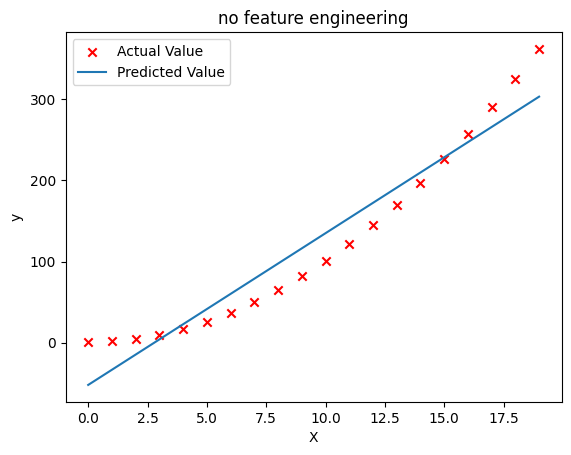

In [22]:
plt.scatter(init, y, marker="x", c="r", label="Actual Value")
plt.plot(init, f_wb(X, w, b), label="Predicted Value")
plt.title("no feature engineering")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [23]:
X = X**2

In [24]:
w, b = gradient_descent(X, y, num_iters=10000, alpha=1e-5)

Iteration    0: Cost  7329.22
Iteration 1000: Cost     0.22
Iteration 2000: Cost     0.22
Iteration 3000: Cost     0.22
Iteration 4000: Cost     0.22
Iteration 5000: Cost     0.22
Iteration 6000: Cost     0.21
Iteration 7000: Cost     0.21
Iteration 8000: Cost     0.21
Iteration 9000: Cost     0.21


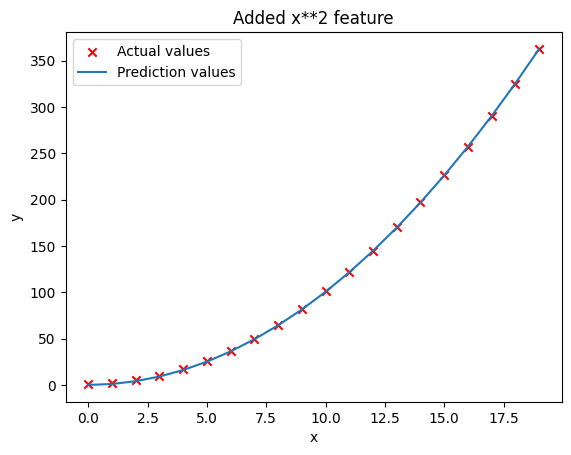

In [25]:
plt.scatter(init, y, marker="x", c="r", label="Actual values")
plt.plot(init, f_wb(X, w, b), label="Prediction values")
plt.title("Added x**2 feature")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Selecting Features

In [26]:
y = init**2
X = np.c_[init, init**2, init**3]
X_features = ["x", "x^2", "x^3"]

In [27]:
w, b = gradient_descent(X, y, num_iters=10000, alpha=1e-7)

Iteration    0: Cost  1140.29
Iteration 1000: Cost   328.54
Iteration 2000: Cost   280.44
Iteration 3000: Cost   239.39
Iteration 4000: Cost   204.34
Iteration 5000: Cost   174.43
Iteration 6000: Cost   148.90
Iteration 7000: Cost   127.10
Iteration 8000: Cost   108.49
Iteration 9000: Cost    92.61


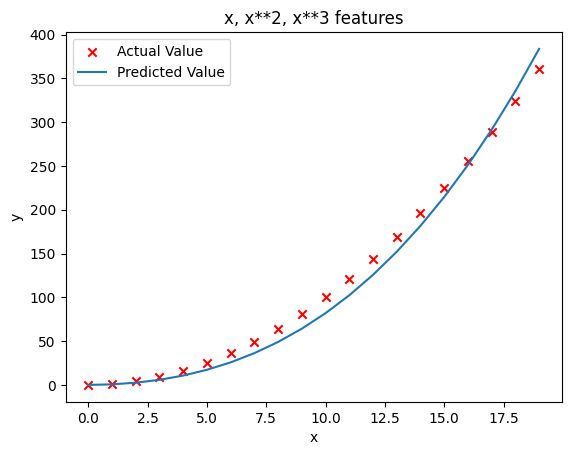

In [28]:
plt.scatter(init, y, marker="x", c="r", label="Actual Value")
plt.plot(init, f_wb(X, w, b), label="Predicted Value")
plt.title("x, x**2, x**3 features")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Notes which W's were changed from zero
these W's will be with selected features.

In [29]:
print(w.round(2), b.round(4))

[0.08 0.54 0.03] 0.0106


An Alternate View<br>
Selected features is the features that suits thr target

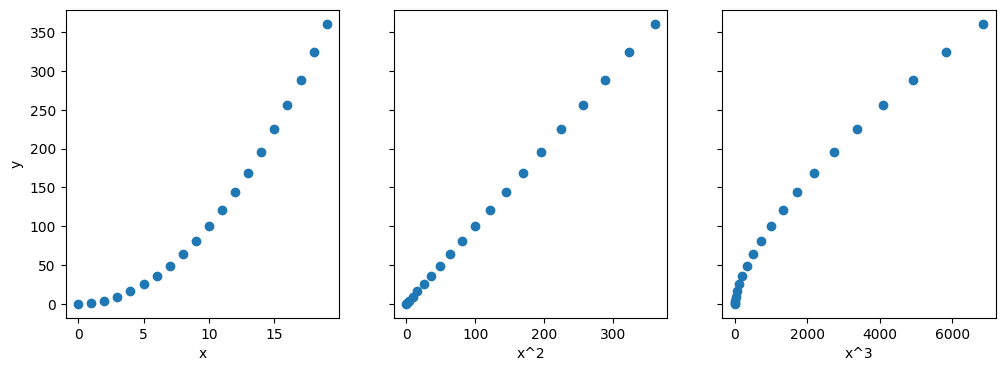

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

Note that x^2 is lineary dependent with target so it's suits the target and we may choose it.

Scaling features make us may ignore the feature selection in simple caces.

In [31]:
X = Z_score(X)

In [32]:
w, b = gradient_descent(X, y, num_iters=100000, alpha=1e-1)

Iteration    0: Cost  9421.47
Iteration 10000: Cost     0.39
Iteration 20000: Cost     0.03
Iteration 30000: Cost     0.00
Iteration 40000: Cost     0.00
Iteration 50000: Cost     0.00
Iteration 60000: Cost     0.00
Iteration 70000: Cost     0.00
Iteration 80000: Cost     0.00
Iteration 90000: Cost     0.00


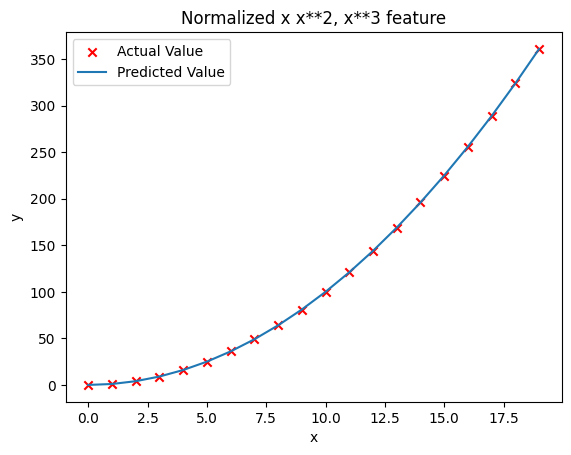

In [33]:
plt.scatter(init, y, marker="x", c="r", label="Actual Value")
plt.title("Normalized x x**2, x**3 feature")
plt.plot(init, f_wb(X, w, b), label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Complex function

In [34]:
y = np.cos(init / 2)

X = np.c_[
    init,
    init**2,
    init**3,
    init**4,
    init**5,
    init**6,
    init**7,
    init**8,
    init**9,
    init**10,
    init**11,
    init**12,
    init**13,
]

In [35]:
X = Z_score(X)

In [36]:
w, b = gradient_descent(X, y, num_iters=1000000, alpha=1e-1)

Iteration    0: Cost     0.22
Iteration 100000: Cost     0.02
Iteration 200000: Cost     0.02
Iteration 300000: Cost     0.01
Iteration 400000: Cost     0.01
Iteration 500000: Cost     0.01
Iteration 600000: Cost     0.01
Iteration 700000: Cost     0.01
Iteration 800000: Cost     0.01
Iteration 900000: Cost     0.01


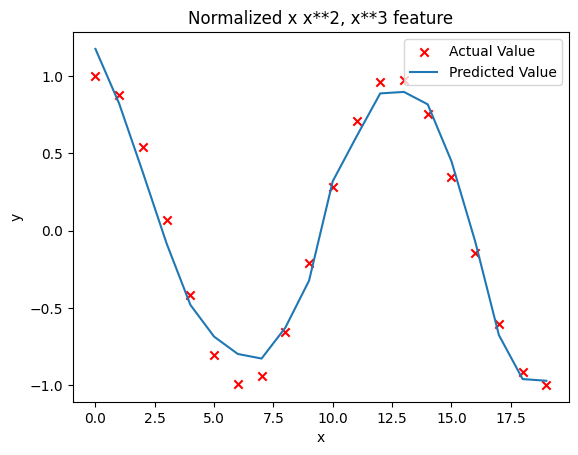

In [37]:
plt.scatter(init, y, marker="x", c="r", label="Actual Value")
plt.plot(init, f_wb(X, w, b), label="Predicted Value")
plt.title("Normalized x x**2, x**3 feature")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Gradient Decent with Scikit-learn

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

Training data

In [39]:
X_train = np.array(
    [
        [1.24e03, 3.00e00, 1.00e00, 6.40e01],
        [1.95e03, 3.00e00, 2.00e00, 1.70e01],
        [1.72e03, 3.00e00, 2.00e00, 4.20e01],
        [1.96e03, 3.00e00, 2.00e00, 1.50e01],
        [1.31e03, 2.00e00, 1.00e00, 1.40e01],
        [8.64e02, 2.00e00, 1.00e00, 6.60e01],
        [1.84e03, 3.00e00, 1.00e00, 1.70e01],
        [1.03e03, 3.00e00, 1.00e00, 4.30e01],
        [3.19e03, 4.00e00, 2.00e00, 8.70e01],
        [7.88e02, 2.00e00, 1.00e00, 8.00e01],
        [1.20e03, 2.00e00, 2.00e00, 1.70e01],
        [1.56e03, 2.00e00, 1.00e00, 1.80e01],
        [1.43e03, 3.00e00, 1.00e00, 2.00e01],
        [1.22e03, 2.00e00, 1.00e00, 1.50e01],
        [1.09e03, 2.00e00, 1.00e00, 6.40e01],
        [8.48e02, 1.00e00, 1.00e00, 1.70e01],
        [1.68e03, 3.00e00, 2.00e00, 2.30e01],
        [1.77e03, 3.00e00, 2.00e00, 1.80e01],
        [1.04e03, 3.00e00, 1.00e00, 4.40e01],
        [1.65e03, 2.00e00, 1.00e00, 2.10e01],
        [1.09e03, 2.00e00, 1.00e00, 3.50e01],
        [1.32e03, 3.00e00, 1.00e00, 1.40e01],
        [1.59e03, 0.00e00, 1.00e00, 2.00e01],
        [9.72e02, 2.00e00, 1.00e00, 7.30e01],
        [1.10e03, 3.00e00, 1.00e00, 3.70e01],
        [1.00e03, 2.00e00, 1.00e00, 5.10e01],
        [9.04e02, 3.00e00, 1.00e00, 5.50e01],
        [1.69e03, 3.00e00, 1.00e00, 1.30e01],
        [1.07e03, 2.00e00, 1.00e00, 1.00e02],
        [1.42e03, 3.00e00, 2.00e00, 1.90e01],
        [1.16e03, 3.00e00, 1.00e00, 5.20e01],
        [1.94e03, 3.00e00, 2.00e00, 1.20e01],
        [1.22e03, 2.00e00, 2.00e00, 7.40e01],
        [2.48e03, 4.00e00, 2.00e00, 1.60e01],
        [1.20e03, 2.00e00, 1.00e00, 1.80e01],
        [1.84e03, 3.00e00, 2.00e00, 2.00e01],
        [1.85e03, 3.00e00, 2.00e00, 5.70e01],
        [1.66e03, 3.00e00, 2.00e00, 1.90e01],
        [1.10e03, 2.00e00, 2.00e00, 9.70e01],
        [1.78e03, 3.00e00, 2.00e00, 2.80e01],
        [2.03e03, 4.00e00, 2.00e00, 4.50e01],
        [1.78e03, 4.00e00, 2.00e00, 1.07e02],
        [1.07e03, 2.00e00, 1.00e00, 1.00e02],
        [1.55e03, 3.00e00, 1.00e00, 1.60e01],
        [1.95e03, 3.00e00, 2.00e00, 1.60e01],
        [1.22e03, 2.00e00, 2.00e00, 1.20e01],
        [1.62e03, 3.00e00, 1.00e00, 1.60e01],
        [8.16e02, 2.00e00, 1.00e00, 5.80e01],
        [1.35e03, 3.00e00, 1.00e00, 2.10e01],
        [1.57e03, 3.00e00, 1.00e00, 1.40e01],
        [1.49e03, 3.00e00, 1.00e00, 5.70e01],
        [1.51e03, 2.00e00, 1.00e00, 1.60e01],
        [1.10e03, 3.00e00, 1.00e00, 2.70e01],
        [1.76e03, 3.00e00, 2.00e00, 2.40e01],
        [1.21e03, 2.00e00, 1.00e00, 1.40e01],
        [1.47e03, 3.00e00, 2.00e00, 2.40e01],
        [1.77e03, 3.00e00, 2.00e00, 8.40e01],
        [1.65e03, 3.00e00, 1.00e00, 1.90e01],
        [1.03e03, 3.00e00, 1.00e00, 6.00e01],
        [1.12e03, 2.00e00, 2.00e00, 1.60e01],
        [1.15e03, 3.00e00, 1.00e00, 6.20e01],
        [8.16e02, 2.00e00, 1.00e00, 3.90e01],
        [1.04e03, 3.00e00, 1.00e00, 2.50e01],
        [1.39e03, 3.00e00, 1.00e00, 6.40e01],
        [1.60e03, 3.00e00, 2.00e00, 2.90e01],
        [1.22e03, 3.00e00, 1.00e00, 6.30e01],
        [1.07e03, 2.00e00, 1.00e00, 1.00e02],
        [2.60e03, 4.00e00, 2.00e00, 2.20e01],
        [1.43e03, 3.00e00, 1.00e00, 5.90e01],
        [2.09e03, 3.00e00, 2.00e00, 2.60e01],
        [1.79e03, 4.00e00, 2.00e00, 4.90e01],
        [1.48e03, 3.00e00, 2.00e00, 1.60e01],
        [1.04e03, 3.00e00, 1.00e00, 2.50e01],
        [1.43e03, 3.00e00, 1.00e00, 2.20e01],
        [1.16e03, 3.00e00, 1.00e00, 5.30e01],
        [1.55e03, 3.00e00, 2.00e00, 1.20e01],
        [1.98e03, 3.00e00, 2.00e00, 2.20e01],
        [1.06e03, 3.00e00, 1.00e00, 5.30e01],
        [1.18e03, 2.00e00, 1.00e00, 9.90e01],
        [1.36e03, 2.00e00, 1.00e00, 1.70e01],
        [9.60e02, 3.00e00, 1.00e00, 5.10e01],
        [1.46e03, 3.00e00, 2.00e00, 1.60e01],
        [1.45e03, 3.00e00, 2.00e00, 2.50e01],
        [1.21e03, 2.00e00, 1.00e00, 1.50e01],
        [1.55e03, 3.00e00, 2.00e00, 1.60e01],
        [8.82e02, 3.00e00, 1.00e00, 4.90e01],
        [2.03e03, 4.00e00, 2.00e00, 4.50e01],
        [1.04e03, 3.00e00, 1.00e00, 6.20e01],
        [1.62e03, 3.00e00, 1.00e00, 1.60e01],
        [8.03e02, 2.00e00, 1.00e00, 8.00e01],
        [1.43e03, 3.00e00, 2.00e00, 2.10e01],
        [1.66e03, 3.00e00, 1.00e00, 6.10e01],
        [1.54e03, 3.00e00, 1.00e00, 1.60e01],
        [9.48e02, 3.00e00, 1.00e00, 5.30e01],
        [1.22e03, 2.00e00, 2.00e00, 1.20e01],
        [1.43e03, 2.00e00, 1.00e00, 4.30e01],
        [1.66e03, 3.00e00, 2.00e00, 1.90e01],
        [1.21e03, 3.00e00, 1.00e00, 2.00e01],
        [1.05e03, 2.00e00, 1.00e00, 6.50e01],
    ]
)
y_train = np.array(
    [
        300.0,
        509.8,
        394.0,
        540.0,
        415.0,
        230.0,
        560.0,
        294.0,
        718.2,
        200.0,
        302.0,
        468.0,
        374.2,
        388.0,
        282.0,
        311.8,
        401.0,
        449.8,
        301.0,
        502.0,
        340.0,
        400.28,
        572.0,
        264.0,
        304.0,
        298.0,
        219.8,
        490.7,
        216.96,
        368.2,
        280.0,
        526.87,
        237.0,
        562.43,
        369.8,
        460.0,
        374.0,
        390.0,
        158.0,
        426.0,
        390.0,
        277.77,
        216.96,
        425.8,
        504.0,
        329.0,
        464.0,
        220.0,
        358.0,
        478.0,
        334.0,
        426.98,
        290.0,
        463.0,
        390.8,
        354.0,
        350.0,
        460.0,
        237.0,
        288.3,
        282.0,
        249.0,
        304.0,
        332.0,
        351.8,
        310.0,
        216.96,
        666.34,
        330.0,
        480.0,
        330.3,
        348.0,
        304.0,
        384.0,
        316.0,
        430.4,
        450.0,
        284.0,
        275.0,
        414.0,
        258.0,
        378.0,
        350.0,
        412.0,
        373.0,
        225.0,
        390.0,
        267.4,
        464.0,
        174.0,
        340.0,
        430.0,
        440.0,
        216.0,
        329.0,
        388.0,
        390.0,
        356.0,
        257.8,
    ]
)
X_features = ["size(sqft)", "bedrooms", "floors", "age"]

Scale/Normalize the training data

In [40]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

Fit the regression model

In [41]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)

SGDRegressor()

- Num of iterations completed
- Number of weight updates

In [42]:
print(f"number of iterations completed: {sgdr.n_iter_}")
print(f"number of weight updates: {sgdr.t_}")

number of iterations completed: 122
number of weight updates: 12079.0


View parameters

In [43]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"w: {w_norm}\nb:{b_norm}")

w: [110.21231868 -21.17141657 -32.42276986 -37.93855742]
b:[363.16137297]


Predict

In [44]:
y_pred = sgdr.predict(X_norm)

See Defference

In [45]:
print(f"Prediction on training set:\n{y_pred[:4].round(1)}")
print(f"Target values:\n{y_train[:4]}")

Prediction on training set:
[294.1 486.8 388.4 492.4]
Target values:
[300.  509.8 394.  540. ]


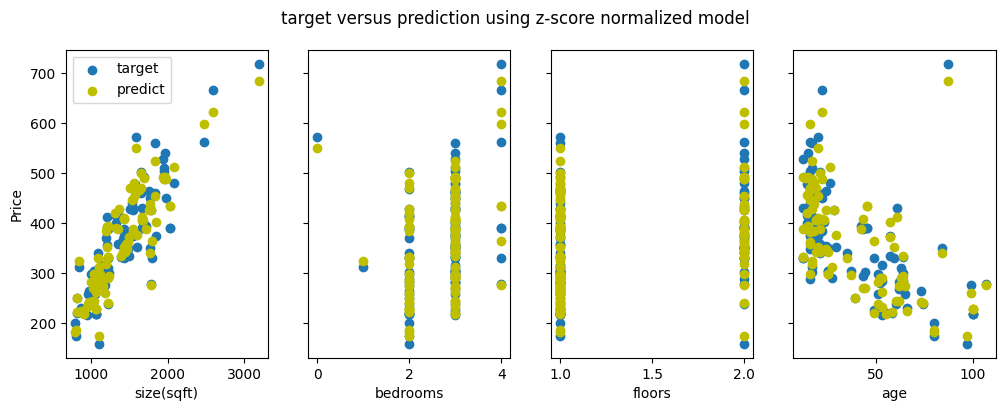

In [46]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="target")
    ax[i].scatter(X_train[:, i], y_pred, color="y", label="predict")
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price")
ax[0].legend()
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

# Normal Equation with Scikit-learn

In [47]:
from sklearn.linear_model import LinearRegression

Training data

In [48]:
X_train = np.array([1.0, 2.0]).reshape(-1, 1)
y_train = np.array([300, 500])

Fit model

In [49]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

View parameters

In [50]:
b = LR.intercept_
w = LR.coef_
print(f"w: {w.round(2)}\nb: {b.round(2)}")

w: [200.]
b: 100.0


Predict

In [51]:
X_test = np.array([[1200]])
y_pred = LR.predict(X_test)
print(f"Prediction for 1200 sqft house: ${y_pred[0]:0.2f}")

Prediction for 1200 sqft house: $240100.00
